In [ ]:
# !pip install kagglehub

In [ ]:
import kagglehub
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
# Importing necessary libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kanakasudheer","key":"d03429d0c6881316e860cac44dc5682e"}'}

In [ ]:
# Load and explore the datase
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [ ]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)
# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


In [ ]:
import os

print(os.listdir(path))

['the_wildfire_dataset_2n_version']


In [ ]:
import os
print(os.listdir())

['.config', 'kaggle.json', 'sample_data']


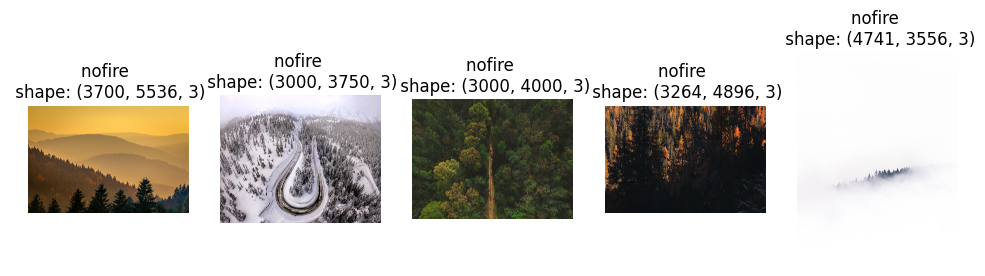

In [ ]:
# Get the class names (subfolders) from the training directory
classes = os.listdir(train_dir)

plt.figure(figsize=(12, 10))
for i in range(5):
  # Access the first class (you can change this to visualize other classes)
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

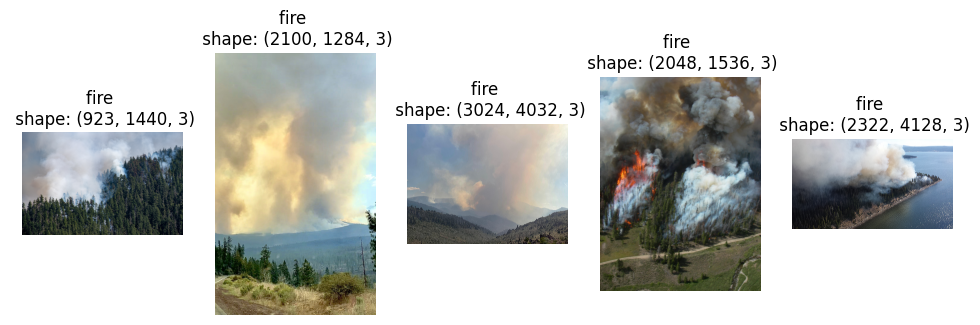

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
def create_model_1():
  """
   CNN model.
  """
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
      MaxPooling2D(2, 2),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.5),  # Add dropout for regularization
      Dense(1, activation='sigmoid') # Binary classification (fire/no fire)
  ])
  return model

def create_model_2():
  """
  A slightly deeper CNN model with more filters.
  """
  model = Sequential([
      Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
      MaxPooling2D(2, 2),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(256, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(512, (3, 3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(1024, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
  ])
  return model

def create_model_3():
  """
  A CNN model inspired by VGG16 architecture (simplified).
  """
  model = Sequential([
      Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_width, img_height, 3)),
      Conv2D(64, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(2, 2),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      Conv2D(128, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(2, 2),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      Conv2D(256, (3, 3), activation='relu', padding='same'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(4096, activation='relu'),
      Dropout(0.5),
      Dense(4096, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
  ])
  return model

# Choose and compile the model
model = create_model_1() # Or create_model_2() or create_model_3()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

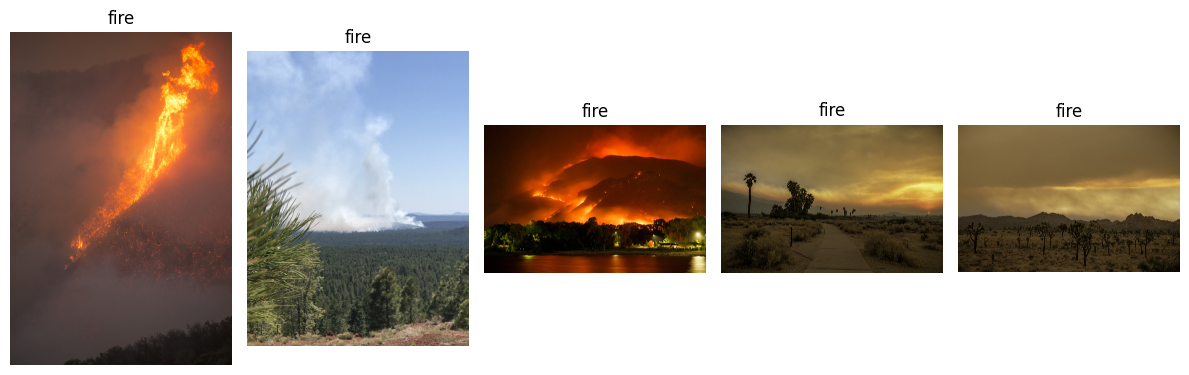

In [ ]:
import random

classes = ['fire']  # List of classes

# Number of images to display per class
num_images_per_class = 5

# Create a figure and axes
plt.figure(figsize=(12, 10))

# Loop through each class
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path) # Get the list of image files for the current class

    # Select random images from the class
    selected_images = random.sample(image_files, num_images_per_class)

    # Display images for the current class
    for image_index, image_file in enumerate(selected_images):
        image_path = os.path.join(class_path, image_file)
        img = plt.imread(image_path) # Load the image for each iteration

        # Correct the subplot index calculation
        plt.subplot(len(classes), num_images_per_class, class_index * num_images_per_class + image_index + 1)
        plt.imshow(img)
        plt.title(f'{class_name}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
classes = os.listdir(train_dir)  # Get the class names (fire, no_fire)

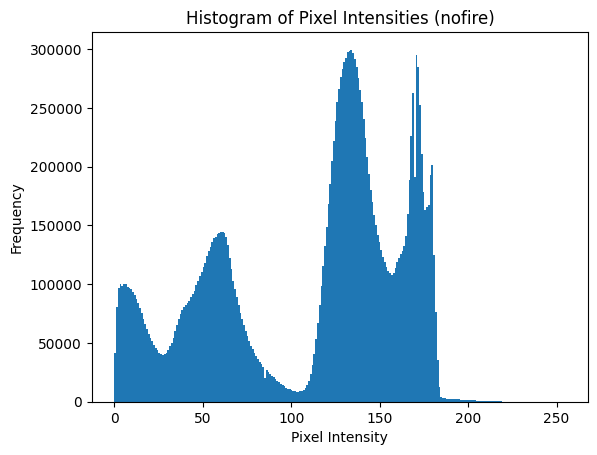

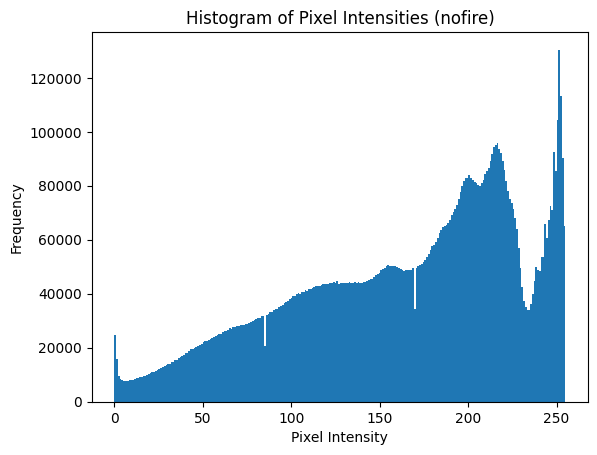

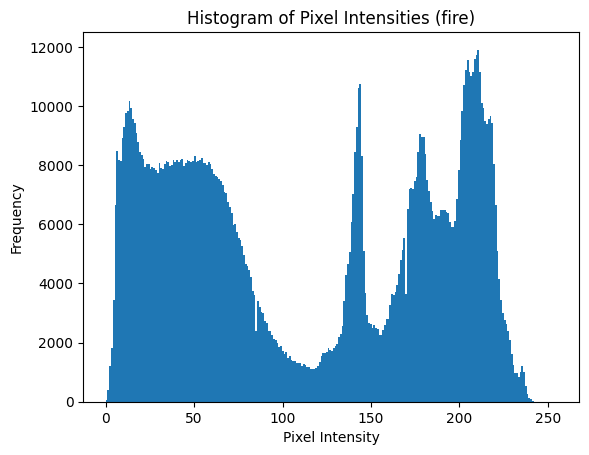

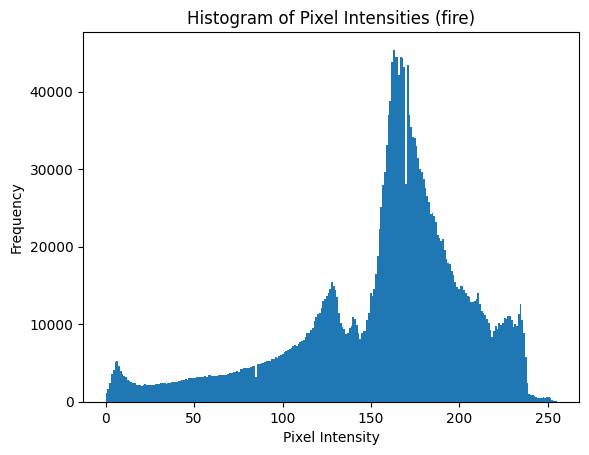

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Path to your dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'

# Loop through each class and display 5 images
for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)[:2]  # Get the first 5 image files

    for image_idx, image_file in enumerate(image_files):
        image_path = os.path.join(class_path, image_file)
        img = plt.imread(image_path)  # Load the image
         # Convert image to grayscale if it's not already
        if len(img.shape) == 3:
            img = np.mean(img, axis=2)  # Average across color channels

        # Create histogram
        plt.figure()
        plt.hist(img.ravel(), bins=256, range=(0, 255))
        plt.title(f'Histogram of Pixel Intensities ({class_name})')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()


In [ ]:
import os
import plotly.express as px

train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
classes = os.listdir(train_dir)

class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in classes]

fig = px.bar(x=classes, y=class_counts,
             title='Class Distribution',
             labels={'x': 'Class', 'y': 'Number of Images'})
fig.show()

<ipython-input-19-2f29c0fd5411>:28: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



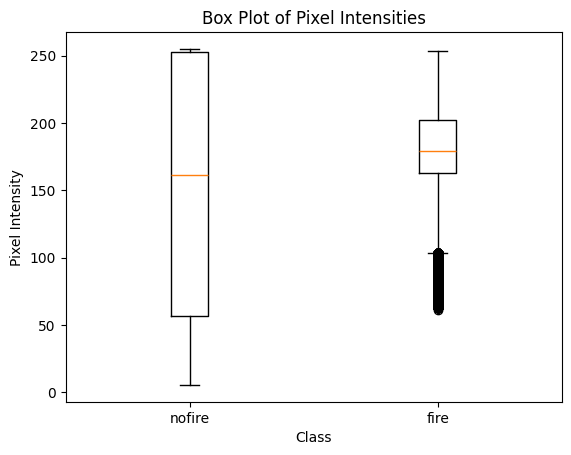

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
classes = os.listdir(train_dir)

pixel_intensities_by_class = {class_name: [] for class_name in classes}

for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)[:5]

    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        img = plt.imread(image_path)

        if len(img.shape) == 3:
            img = np.mean(img, axis=2)

        # Resize images to a consistent size before flattening
        img = np.resize(img, (150, 150)) # Choose a suitable size for your images

        pixel_intensities_by_class[class_name].extend(img.ravel()) # Use extend instead of append


plt.figure()
plt.boxplot(pixel_intensities_by_class.values(), labels=pixel_intensities_by_class.keys())
plt.title('Box Plot of Pixel Intensities')
plt.xlabel('Class')
plt.ylabel('Pixel Intensity')
plt.show()

In [ ]:
import tensorflow as tf

# Define a sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)), # Input layer with 784 features
  tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 classes (e.g., digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate some sample data (replace with your actual data)
import numpy as np
num_samples = 1000
x_train = np.random.rand(num_samples, 784)
y_train = np.random.randint(0, 10, num_samples)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

# Train the model
model.fit(x_train, y_train, epochs=10)

# Make predictions
predictions = model.predict(x_train[:5])  # Predict on the first 5 samples
print(predictions)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0830 - loss: 2.4530
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1476 - loss: 2.2617
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1839 - loss: 2.2313
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1893 - loss: 2.1973
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1978 - loss: 2.1911
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 2.0968
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3321 - loss: 2.0334
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3332 - loss: 1.9857
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3773 - loss: 1.9439
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4134 - loss: 1.8898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
[[0.07129289 0.03494903 0.1194061  0.09487049 0.07932194 0.06302093
  0.05954064 0.21714877 0.13209149 0.1283577 ]
 [0.

Extracting features for scatter plot from 50 images per class...
Feature extraction complete. Creating scatter plot...


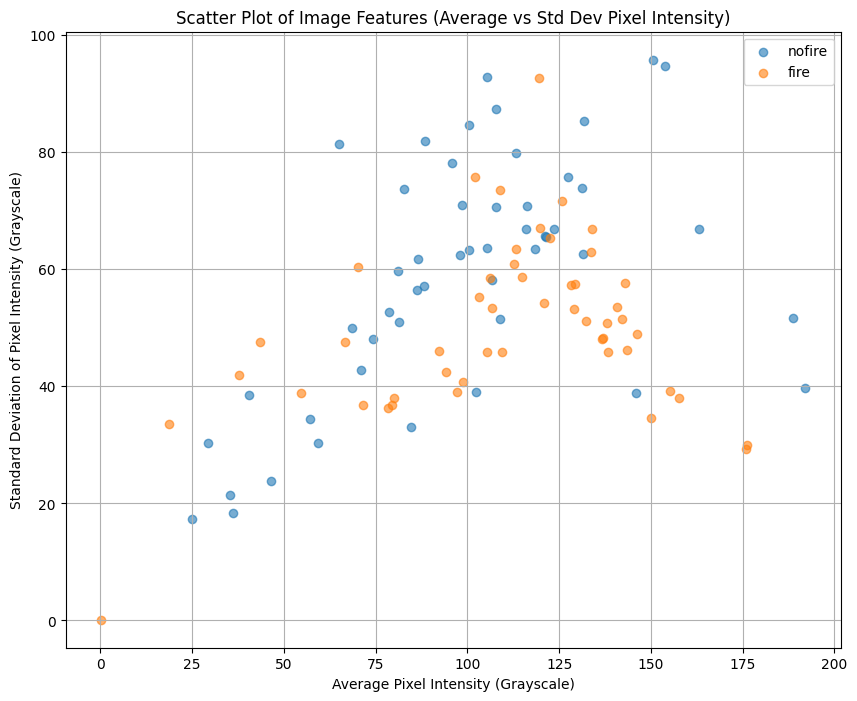

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
classes = os.listdir(train_dir)

# Lists to store extracted features and class labels
avg_intensities = []
std_intensities = []
image_labels = []

# Limit the number of images per class for the scatter plot for clarity
num_images_to_sample = 50

print(f"Extracting features for scatter plot from {num_images_to_sample} images per class...")

for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)
    # Sample a subset of images
    sampled_image_files = np.random.choice(image_files, min(len(image_files), num_images_to_sample), replace=False)

    for image_file in sampled_image_files:
        image_path = os.path.join(class_path, image_file)
        try:
            img = plt.imread(image_path)

            # Convert image to grayscale if it's not already
            if len(img.shape) == 3:
                img_gray = np.mean(img, axis=2)
            else:
                img_gray = img # Already grayscale or single channel

            # Flatten the image to calculate statistics
            img_flat = img_gray.ravel()

            # Calculate average and standard deviation of pixel intensities
            avg_intensity = np.mean(img_flat)
            std_intensity = np.std(img_flat)

            # Append features and label
            avg_intensities.append(avg_intensity)
            std_intensities.append(std_intensity)
            image_labels.append(class_name)

        except Exception as e:
            print(f"Could not process image {image_file}: {e}")
            continue # Skip to the next image if there's an error loading

# Convert lists to numpy arrays for easier handling
avg_intensities = np.array(avg_intensities)
std_intensities = np.array(std_intensities)
image_labels = np.array(image_labels)

print("Feature extraction complete. Creating scatter plot...")

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot data for each class separately
for i, class_name in enumerate(classes):
    # Select data points belonging to the current class
    class_mask = (image_labels == class_name)
    plt.scatter(avg_intensities[class_mask], std_intensities[class_mask], label=class_name, alpha=0.6)

plt.title('Scatter Plot of Image Features (Average vs Std Dev Pixel Intensity)')
plt.xlabel('Average Pixel Intensity (Grayscale)')
plt.ylabel('Standard Deviation of Pixel Intensity (Grayscale)')
plt.legend()
plt.grid(True)
plt.show()